Question 1:
a)

Before Min_Max Normalization:
                      Min           Max
temperature     10.085110     31.375000
humidity        34.205670     99.720000
pressure       992.654583   1037.604386
rain             0.000000   2470.500000
lightavgw/o0     0.000000  10565.352300
lightmax      2259.000000  54612.000000
moisture         0.000000    100.000000

After Min_Max Normalization:
              Min  Max
temperature   3.0  9.0
humidity      3.0  9.0
pressure      3.0  9.0
rain          3.0  9.0
lightavgw/o0  3.0  9.0
lightmax      3.0  9.0
moisture      3.0  9.0

b)

Before Standardization:
                      Mean  Standard Dev
temperature      21.369665      4.125407
humidity         83.992117     17.565823
pressure       1014.760524      6.121343
rain            168.400011    399.689066
lightavgw/o0   2197.392401   2220.820133
lightmax      21788.623280  22064.993089
moisture         32.386053     33.653245

After Standardization:
              Mean  Standard Dev
temper

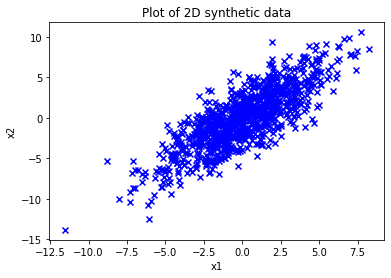

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
df=pd.read_csv('landslide_data3.csv')
df.drop(['dates','stationid'],axis=1,inplace=True) #removing unwanted columns

#1
print('Question 1:')
n=0 #Initializing attribute count as 0
for i in df.columns:
    bottom_whis=2.5*np.percentile(df[i],25)-1.5*np.percentile(df[i],75) #Q1-1.5*IQR
    upper_whis=2.5*np.percentile(df[i],75)-1.5*np.percentile(df[i],25)  #Q3+1.5*IQR
    outliers=df[i][(df[i]<bottom_whis) | (df[i]>upper_whis)] #Dataframe of outliers in df[i]
    df.iloc[outliers.index,n]=(df[i].drop(outliers.index)).median() #Replacing outliers with median of remaning values of df[i]
    n+=1 #Incrementing attribute count
#a
print('a)')
df_a=df.copy() #Copying df
def Min_Max():#Function for computing Minimum and Maximum
    min_max=pd.concat((df_a.min(),df_a.max()),axis=1) #Dataframe with min and max of Df
    min_max=min_max.T
    index=pd.Series(['Min','Max'])
    min_max.set_index([index],inplace=True) #Setting Index
    min_max=min_max.T
    print(min_max)
print('\nBefore Min_Max Normalization:')
Min_Max() #Function call

df_a=(df-df.min())/(df.max()-df.min())*(9-3)+3 #Min_Max Normalization
print('\nAfter Min_Max Normalization:')
Min_Max() #Function call

#b
print('\nb)')
df_b=df.copy() #Copying df
def Standardization(): #Function for computing Mean and Standard Deviation 
    mean_std=pd.concat((round(df_b.mean(),6),df_b.std()),axis=1)#Dataframe with Mean and Std Dev of Df
    mean_std=mean_std.T
    index=pd.Series(['Mean','Standard Dev'])
    mean_std.set_index([index],inplace=True) #Setting Index
    mean_std=mean_std.T
    print(mean_std)
print('\nBefore Standardization:')
Standardization()#Function call

df_b=(df-df.mean())/(df.std())
print('\nAfter Standardization:')
Standardization()#Function call

#2
print('\nQuestion 2:')
mean=np.array([0,0])
cov=np.array([[5,10],[10,13]])
D=np.random.multivariate_normal(mean,cov,1000,'ignore') #Generating Data

#a
print('a)')
plt.scatter(D.T[0],D.T[1],marker='x',color='blue')
plt.xlabel('x1');plt.ylabel('x2')
plt.title('Plot of 2D synthetic data');plt.show()